In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

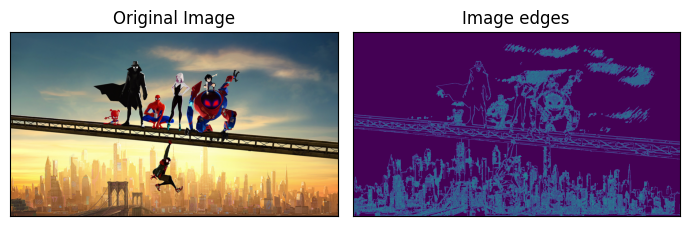

In [3]:
# test code with builtin functions
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('spiderman.jpg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

edges = cv2.Canny(image= image_rgb, threshold1=50, threshold2=150)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

axs[1].imshow(edges)
axs[1].set_title('Image edges')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [5]:
import numpy as np
from scipy.ndimage import convolve
from scipy.ndimage.filters import gaussian_filter

def canny_edge_detection(image, low_threshold, high_threshold):
  # rgb to grey scale conversion
  # weighted average of the red, green, and blue
    if len(image.shape) == 3:
        gray = 0.2989 * image[..., 0] + 0.5870 * image[..., 1] + 0.1140 * image[..., 2]
    else:
        gray = image
      # for noidse reduction blurs for better accuracy
    blurred = gaussian_filter(gray, sigma=1.4)

    # 3. Calculate gradients ||| detects changes in internsty
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    Ix = convolve(blurred, Kx)
    Iy = convolve(blurred, Ky)
    gradient_magnitude = np.sqrt(Ix**2 + Iy**2)
    gradient_direction = np.arctan2(Iy, Ix)

    # gradient magnitudes to a range of 0–255 for consistency.
    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255

    def non_max_suppression(magnitude, direction):
        rows, cols = magnitude.shape
        suppressed = np.zeros_like(magnitude, dtype=np.float32)
        angle = direction * 180.0 / np.pi
        angle[angle < 0] += 180

        for i in range(1, rows - 1):
            for j in range(1, cols - 1):
                q, r = 255, 255

                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = magnitude[i, j + 1]
                    r = magnitude[i, j - 1]

                elif 22.5 <= angle[i, j] < 67.5:
                    q = magnitude[i + 1, j - 1]
                    r = magnitude[i - 1, j + 1]

                elif 67.5 <= angle[i, j] < 112.5:
                    q = magnitude[i + 1, j]
                    r = magnitude[i - 1, j]

                elif 112.5 <= angle[i, j] < 157.5:
                    q = magnitude[i - 1, j - 1]
                    r = magnitude[i + 1, j + 1]

                if magnitude[i, j] >= q and magnitude[i, j] >= r:
                    suppressed[i, j] = magnitude[i, j]
                else:
                    suppressed[i, j] = 0

        return suppressed

    suppressed = non_max_suppression(gradient_magnitude, gradient_direction)
    # classifies into strong and weak and no edges
    strong = 255
    weak = 75
    strong_x, strong_y = np.where(suppressed >= high_threshold)
    weak_x, weak_y = np.where((suppressed <= high_threshold) & (suppressed >= low_threshold))

    edges = np.zeros_like(suppressed, dtype=np.uint8)
    edges[strong_x, strong_y] = strong
    edges[weak_x, weak_y] = weak

    def hysteresis(img):
        rows, cols = img.shape
        for i in range(1, rows - 1):
            for j in range(1, cols - 1):
                if img[i, j] == weak:
                    if (
                        strong in [
                            img[i + 1, j - 1],
                            img[i + 1, j],
                            img[i + 1, j + 1],
                            img[i, j - 1],
                            img[i, j + 1],
                            img[i - 1, j - 1],
                            img[i - 1, j],
                            img[i - 1, j + 1],
                        ]
                    ):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
        return img
    # punction ka bulava
    final_edges = hysteresis(edges)
    return final_edges


<ipython-input-5-5552a4996248>:3: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


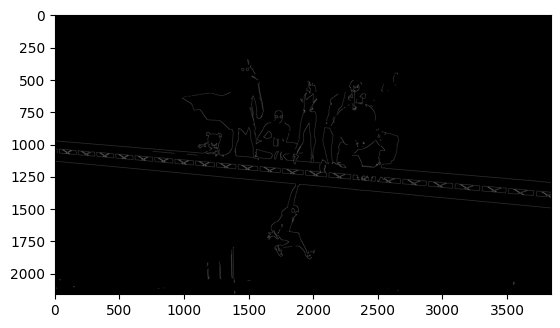

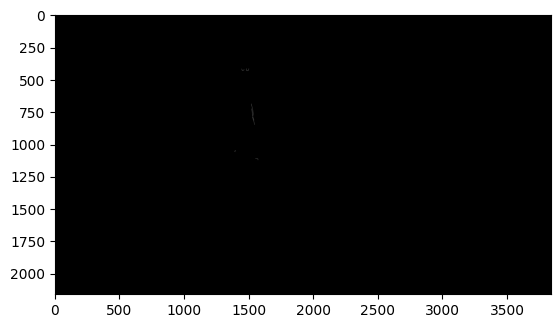

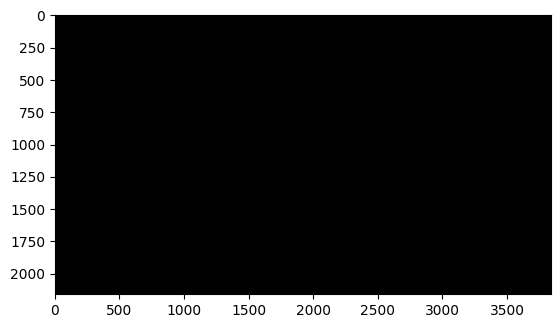

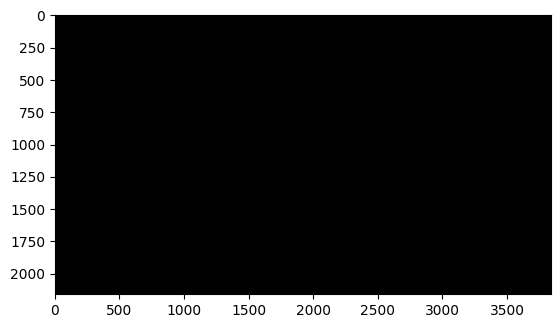

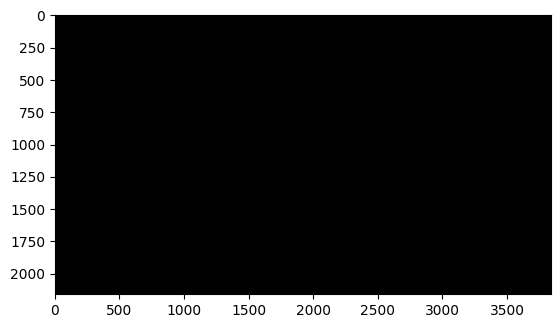

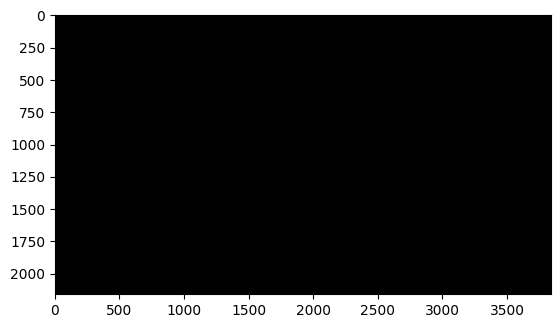

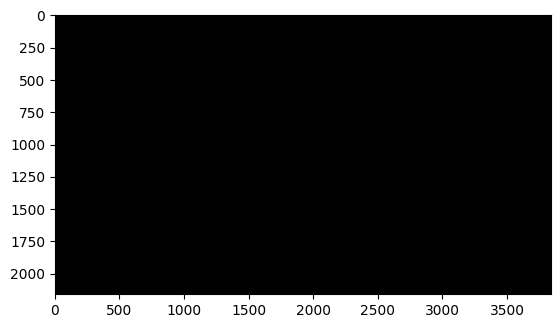

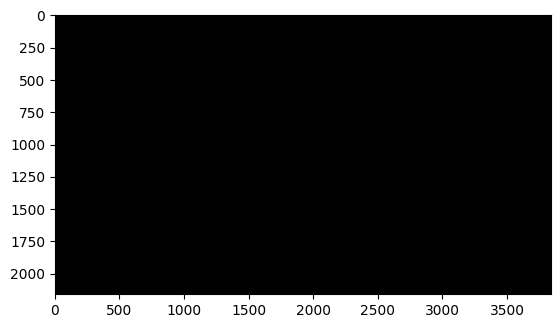

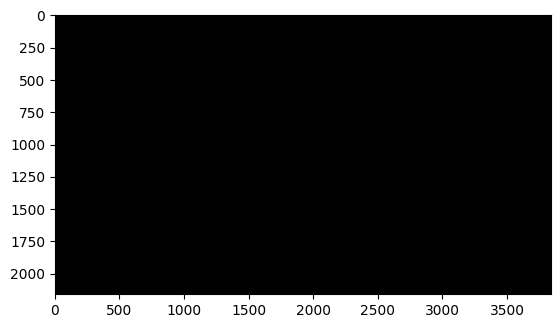

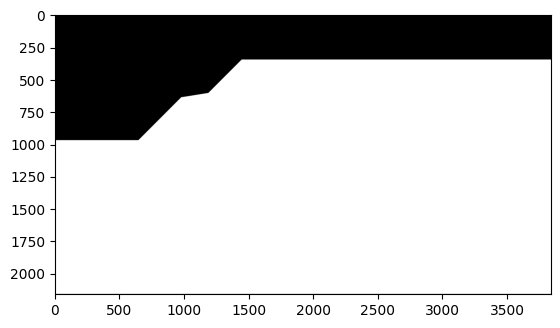

In [14]:


import cv2
from matplotlib import pyplot as plt

# chitr ka loading
image = cv2.imread('spiderman.jpg')

# applying the above described shit edge detection
edges10 = canny_edge_detection(image, low_threshold=0, high_threshold=50)

edges1 = canny_edge_detection(image, low_threshold=50, high_threshold=150)
edges2 = canny_edge_detection(image, low_threshold=50, high_threshold=250)
edges3 = canny_edge_detection(image, low_threshold=50, high_threshold=350)
edges4 = canny_edge_detection(image, low_threshold=50, high_threshold=450)
edges5 = canny_edge_detection(image, low_threshold=50, high_threshold=550)
edges6 = canny_edge_detection(image, low_threshold=50, high_threshold=650)
edges7 = canny_edge_detection(image, low_threshold=50, high_threshold=750)
edges8 = canny_edge_detection(image, low_threshold=50, high_threshold=850)
edges9 = canny_edge_detection(image, low_threshold=50, high_threshold=950)


# Display the result
plt.imshow(edges1, cmap='gray')
plt.show()

plt.imshow(edges2, cmap='gray')
plt.show()

plt.imshow(edges3, cmap='gray')
plt.show()

plt.imshow(edges4, cmap='gray')
plt.show()

plt.imshow(edges5, cmap='gray')
plt.show()

plt.imshow(edges6, cmap='gray')
plt.show()

plt.imshow(edges7, cmap='gray')
plt.show()

plt.imshow(edges8, cmap='gray')
plt.show()

plt.imshow(edges9, cmap='gray')
plt.show()

plt.imshow(edges10, cmap='gray')
plt.show()

# plt.title('Canny Edges')
